In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter

In [39]:
#Home directory
import os
os.chdir(os.path.expanduser("~"))

In [40]:
df = pd.read_csv('intro to data midterm/NCVS_2020.csv')
df

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
0,2020.1,1.602010e+24,9,37,2,1,6,1,2,2,...,1,1,9,9,11,3,1,2,4,1
1,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
2,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
3,2020.1,1.602070e+24,5,21,2,1,1,9,2,2,...,1,1,9,9,12,3,1,1,4,1
4,2020.1,1.602070e+24,5,37,2,1,1,9,2,2,...,4,1,9,9,26,1,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,2020.4,1.998940e+24,3,47,3,5,1,9,2,2,...,1,1,9,9,23,1,3,2,4,3
8039,2020.4,1.998940e+24,2,47,2,1,1,9,2,2,...,1,2,2,9,99,9,9,9,1,2
8040,2020.4,1.998940e+24,2,47,2,1,1,9,2,2,...,1,2,2,9,99,9,9,9,1,2
8041,2020.4,1.998950e+24,7,57,1,1,1,9,2,2,...,1,1,9,9,4,3,1,1,4,1


In [41]:
#Creating a function that determines if the subject has a disability 
def calculate_disability_status(row):
    if row['DIS_VIS'] == 1 or row['DIS_LEARN'] == 1 or row['DIS_PHYS'] == 1 or row['DIS_DRESS_BATHE'] == 1 or row['DIS_LEAVING_HOME'] == 1:
        return 2
    else:
        return 1
#applying this function to a new COLUMN called 'DIS_NONE' for my part C analysis
df['DIS_NONE'] = df.apply(calculate_disability_status, axis=1)


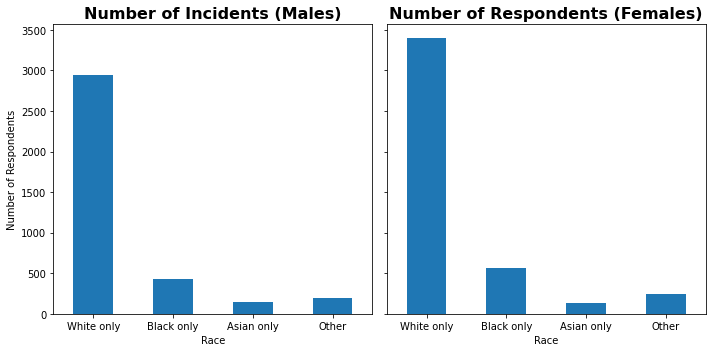

0

In [24]:
# replace all values in the "race" column that are greater than or equal to 5 with 5
df["RACE"] = df["RACE"].apply(lambda x: 5 if x >= 5 else x)

race_dict = {
    1: 'White only',
    2: 'Black only',
    3: 'Other',
    4: 'Asian only',
    5: 'Other'
}

# Create the sex dictionary
sex_dict = {1: 'Male', 2: 'Female'}

# Replace the values in the "SEX" column with the corresponding labels in the sex_dict
df['SEX_LABEL'] = df['SEX'].map(sex_dict)


# map the race values to their labels using the race_dict
df['RACE_LABEL'] = df['RACE'].map(race_dict)



# group the data by sex and race label and count the number of incidents
grouped_data = df.groupby(['SEX_LABEL', 'RACE_LABEL'])['NUM_INCIDENTS'].count()

# get the data for males and females separately
males = grouped_data['Male']
females = grouped_data['Female']

males = males.reindex(['White only', 'Black only', 'Asian only', 'Other'])
females = females.reindex(['White only', 'Black only', 'Asian only', 'Other'])
# create two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey = True)

# plot the data for males on the left subplot
males.plot(kind='bar', ax=axs[0])
axs[0].set_title('Number of Incidents (Males)', fontweight = 'bold', fontsize = 16)
axs[0].set_xlabel('Race')
axs[0].set_ylabel('Number of Respondents')
axs[0].set_xticklabels(males.index, rotation=0)


# plot the data for females on the right subplot
females.plot(kind='bar', ax=axs[1])
axs[1].set_title('Number of Respondents (Females)', fontweight = 'bold', fontsize = 16)
axs[1].set_xlabel('Race')
axs[1].set_ylabel('Number of Respondents')
axs[1].set_xticklabels(females.index, rotation=0)


# show the chart
plt.tight_layout()
plt.show()
0

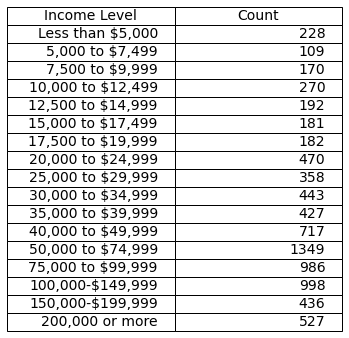

In [25]:

# create the dictionary to map the income level numbers to their string labels
income_labels = {
    1: "Less than $5,000",
    2: "5,000 to $7,499",
    3: "7,500 to $9,999",
    4: "10,000 to $12,499",
    5: "12,500 to $14,999",
    6: "15,000 to $17,499",
    7: "17,500 to $19,999",
    8: "20,000 to $24,999",
    9: "25,000 to $29,999",
    10: "30,000 to $34,999",
    11: "35,000 to $39,999",
    12: "40,000 to $49,999",
    13: "50,000 to $74,999",
    15: "75,000 to $99,999",
    16: "100,000-$149,999",
    17: "150,000-$199,999",
    18: "200,000 or more"
}

# group the data by income level and count the number of incidents
grouped_data = df.groupby(['INCOME'])['NUM_INCIDENTS'].count()

# sort the grouped data by the income level
grouped_data = grouped_data.sort_index()

# replace the income level numbers with their string labels
grouped_data.index = [income_labels[x] for x in grouped_data.index]

# create a table from the grouped data
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table = ax.table(cellText=grouped_data.reset_index().values, colLabels=['Income Level', 'Count'], loc='center')
table.set_fontsize(14)
table.scale(1, 1.5)

# show the table
plt.show()


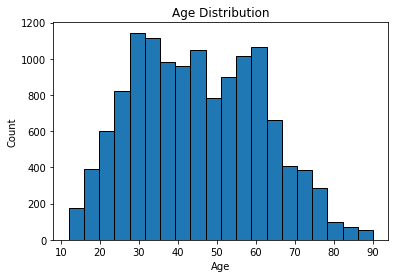

In [26]:
# create a histogram of the "AGE" column, with weights based on the "NUM_INCIDENTS" column
plt.hist(df["AGE"], weights=df["NUM_INCIDENTS"], bins=20, edgecolor='black')

# add x and y axis labels and a title to the chart
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# show the chart
plt.show()


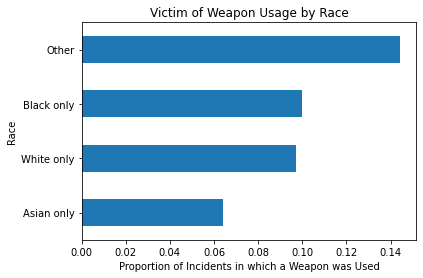

In [27]:
# Filter the data to only include rows where the WEAPON column is 1 or 2
df = df[df['WEAPON'].isin([1, 2])]

# Group the data by race and count the number of times a weapon was used
grouped_data = df.groupby('RACE_LABEL')['WEAPON'].value_counts(normalize=True)

# Unstack the grouped data so that the race and weapon use columns are separate
grouped_data = grouped_data.unstack()

# Calculate the proportion of incidents in which a weapon was used for each race
grouped_data = grouped_data[1]

# Sort the data by the proportion of incidents in which a weapon was used
grouped_data = grouped_data.sort_values()

# Plot the bar chart
grouped_data.plot(kind='barh')


# Add x and y axis labels and a title to the chart
plt.xlabel('Proportion of Incidents in which a Weapon was Used')
plt.ylabel('Race')
plt.title('Victim of Weapon Usage by Race')

# Show the chart
plt.show()


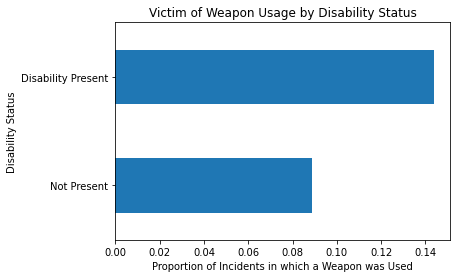

In [33]:
# Filter the data to only include rows where the WEAPON column is 1 or 2
df = df[df['WEAPON'].isin([1, 2])]

# Group the data by sex and count the number of times a weapon was used
grouped_data = df.groupby('DIS_NONE')['WEAPON'].value_counts(normalize=True)

# Unstack the grouped data so that the sex and weapon use columns are separate
grouped_data = grouped_data.unstack()

# Calculate the proportion of incidents in which a weapon was used for each sex
grouped_data = grouped_data[1]

# Plot the bar chart
grouped_data.plot(kind='barh')

# Add x and y axis labels and a title to the chart
plt.xlabel('Proportion of Incidents in which a Weapon was Used')
plt.ylabel('Disability Status')
plt.title('Victim of Weapon Usage by Disability Status')

# Set y-tick labels
plt.yticks([0, 1], ['Not Present', 'Disability Present'])

# Show the chart
plt.show()


In [29]:
# Create a new dataframe with proportions
df_prop = pd.DataFrame(columns=['Disability', 'FORCED_SEX', 'STOLEN', 'VEHICLE_THEFT'])

# Calculate proportions for each disability and crime
for disability in ['DIS_HEAR', 'DIS_VIS', 'DIS_LEARN', 'DIS_PHYS']:
    # Calculate total number of people with the disability
    total_dis = df[disability].count()

    # Calculate proportions for each crime
    prop_fs = df[(df[disability]==1) & (df['FORCED_SEX']==1)]['FORCED_SEX'].count() / total_dis
    prop_s = df[(df[disability]==1) & (df['STOLEN']==1)]['STOLEN'].count() / total_dis
    prop_vt = df[(df[disability]==1) & (df['VEHICLE_THEFT']==1)]['VEHICLE_THEFT'].count() / total_dis
    
    # Add row to dataframe
    df_prop = df_prop.append({'Disability': disability, 
                              'FORCED_SEX': prop_fs, 
                              'STOLEN': prop_s, 
                              'VEHICLE_THEFT': prop_vt}, 
                             ignore_index=True)


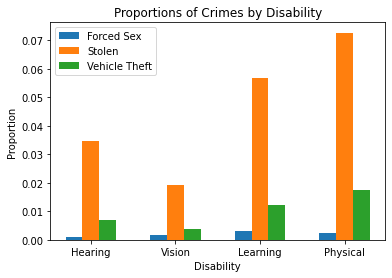

In [30]:
# Create figure and axis
fig, ax = plt.subplots()

# Set x values and bar width
x = np.arange(len(df_prop))
width = 0.2

# Set y values
y_fs = df_prop['FORCED_SEX']
y_s = df_prop['STOLEN']
y_vt = df_prop['VEHICLE_THEFT']

# Plot bars next to each other with desired legend labels
ax.bar(x - width, y_fs, width=width, label='Forced Sex')
ax.bar(x, y_s, width=width, label='Stolen')
ax.bar(x + width, y_vt, width=width, label='Vehicle Theft')

# Set x-tick labels
ax.set_xticks(x)
ax.set_xticklabels(['Hearing', 'Vision', 'Learning', 'Physical'])

# Set labels and title
ax.set_xlabel('Disability')
ax.set_ylabel('Proportion')
ax.set_title('Proportions of Crimes by Disability')

# Add legend
ax.legend()

# Display plot
plt.show()


In [31]:
df_prop

,Disability,FORCED_SEX,STOLEN,VEHICLE_THEFT
0,DIS_HEAR,0.000870,0.034689,0.007087
1,DIS_VIS,0.001616,0.019147,0.003730
2,DIS_LEARN,0.003233,0.056695,0.012060
3,DIS_PHYS,0.002487,0.072610,0.017406
